## Wordcloud of Top 75 Words in Shakespeare's Hamlet

### Global parameters 

You will need to have set up a [Karst account](https://kb.iu.edu/d/bezu#account) first. Once you have your Karst account simply go to [rstudio.iu.edu](https://rstudio.iu.edu/auth-sign-in) and login using your IU username and passphrase.  Next, set the working directory by pointing to the location on Karst where you have stored the files. Below, we have chosen to save the folder "Text-Analysis" as a "Project" in R Studio on the Karst super-computer here at Indiana University. It contains the R scripts, texts, notebooks, and results. If you have forked and cloned the Github repository (see [textPrep.Rmd](textPrep.Rmd) for directions on how), simply point to where you have saved the folder. If you save it to your personal Karst folder, it will most likely look very similar to the example below. Karst is a unix server and so the home directory is represented by a ~ and, thus, the path will look like this "~/Text-Analysis/" (with the quotes). Alternatively, if you are on a PC, you will need to use an absolute path such as "C:/Users/XXX" (with the quotes again).

In R Studio, click Session in the menu bar > Set Working Directory > Choose Directory, then select the Text-Analysis directory in which you are working. This will set your working directory in the console pane, but make sure to copy the path into the source pane above to keep the directory constant if you close this script and reopen later. Make sure you click on the blue cube with a "R" in the center to set your working directory to your Text-Analysis project path.

HINT: Your working directory is the folder from which you will be pulling your texts.

In [1]:
setwd("~/Text-Analysis")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

In [2]:
library(wordcloud)
library(tm)
library(RColorBrewer)

Loading required package: RColorBrewer
Loading required package: NLP


Load data (plaintext file), telling the computer that it is formatted by line breaks

In [3]:
text_raw<-scan("data/shakespeareFolger/Hamlet.txt", what="character", sep="\n")

#### Prepare text data

The tm library works with a "corpus," which can represent a single text, many texts, and even different types of inputs, such as CSV files. In this case, we only have one text in our corpus, but will follow tm's naming conventions for the variables.

In [4]:
#Create a corpus 
corpus <- Corpus(VectorSource(text_raw))

One of the great things about using tm is that it has many text cleaning functions built into it. Here we have removed extra white space, transformed all the text to lower case, removed stopwords, removed punctuation, and converted it to plain text. It is possible to use an "english" (or other language) stopword list, but we have found the SMART list to be more complete, for example, "said" is on the SMART stopword list but not on the standard "english" list. However, since we are analyzing Shakespeare we also created our own Early Modern English stopword list, and, while the SMART list is more complete, it does not work well with the Early Modern list, so for the purposes of this notebook, we recommend you use the "english" stopword list in conjunction with the Early Modern English stopword list. 

In [5]:
myStopWords <- scan("data/earlyModernStopword.txt", what="character", sep="\n")
corpus <- tm_map(corpus, removeWords, c(stopwords("english"), myStopWords))
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)

Plot the wordcloud! There are a number of arguments you can customize: "random.order" is false so that words are plotted in order of decreasing frequency; "scale"" indicates the size of the words; "rot.per" lets you customize the proportion of words that are rotated 90 degrees; "max.words" controls how many words show up in the wordcloud; and we've used the library "RColorBrewer" to give us access to some predefined palettes. Note that if you change the palette, you need to tell the argument how many colors are in the new palette. 

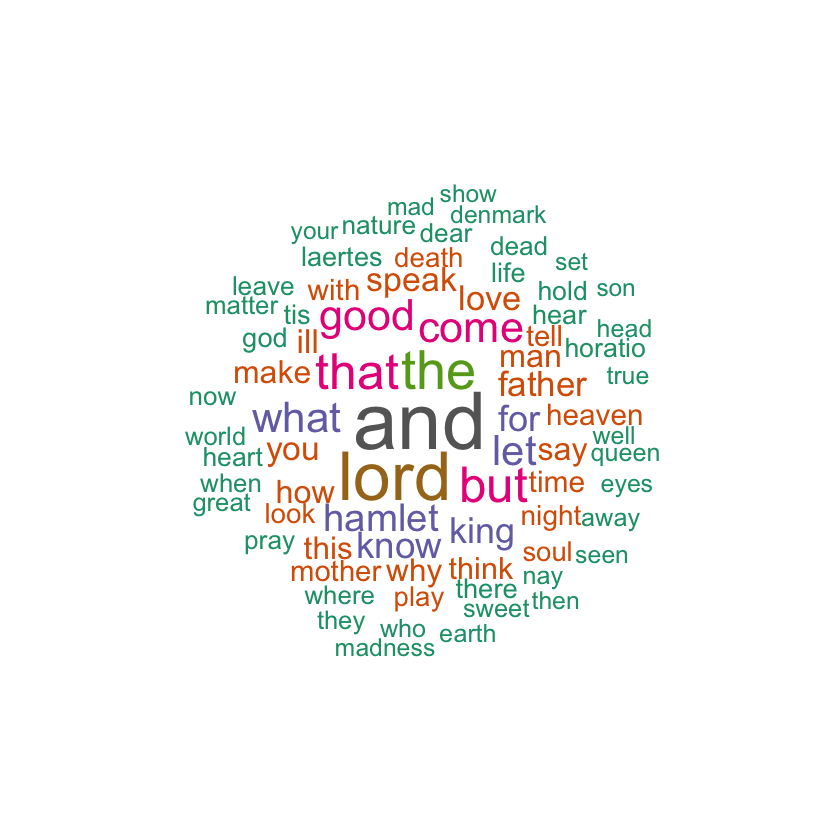

In [6]:
wordcloud(corpus,random.order=FALSE,scale=c(4,1),rot.per=0,
          max.words=75,colors=brewer.pal(8, "Dark2"))

### Voila!